<a href="https://colab.research.google.com/github/dansssvvx/3.5-College/blob/main/Tugas_CPMK_1_REVIEW_PANTAI_SEMETI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rata-rata jumlah kata per review: 27.21212121212121
Standar deviasi jumlah kata per review: 26.422951169103886


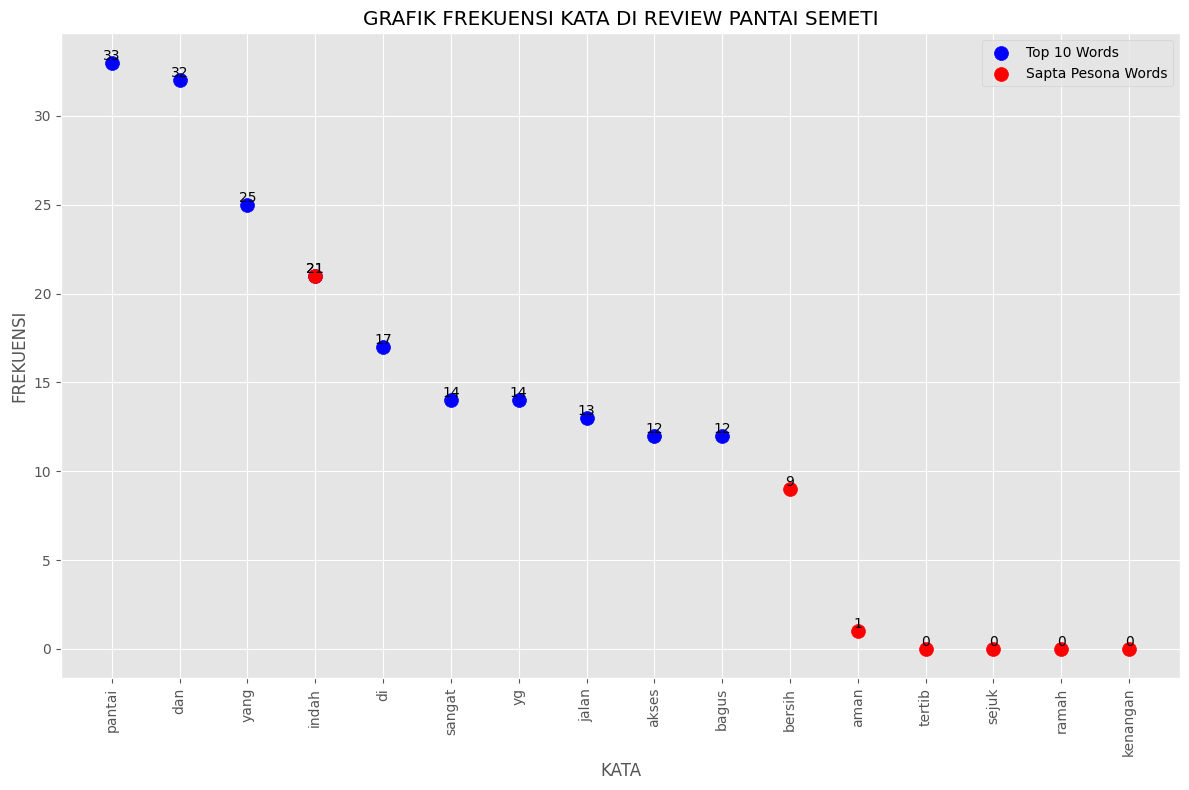

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

df = pd.read_excel('REVIEW PANTAI SEMETI.xlsx')

def tokenize_text(text):
    text = text.replace(',', '').replace('.', '').replace('!', '').replace('"', '')
    return text.lower().split()

df['tokens'] = df['Review'].apply(tokenize_text)

all_words = [word for tokens in df['tokens'] for word in tokens]

word_counts = Counter(all_words)

word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

df['word_count'] = df['tokens'].apply(len)

mean_word_count = df['word_count'].mean()
std_dev_word_count = df['word_count'].std()

print(f"Rata-rata jumlah kata per review: {mean_word_count}")
print(f"Standar deviasi jumlah kata per review: {std_dev_word_count}")

specific_words = ['aman', 'tertib', 'bersih', 'sejuk', 'indah', 'ramah', 'kenangan']

specific_word_counts = {word: word_counts[word] for word in specific_words}

specific_word_counts_df = pd.DataFrame(list(specific_word_counts.items()), columns=['Word', 'Count'])

specific_word_counts_df = specific_word_counts_df.sort_values(by='Count', ascending=False)

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(12, 8))

# Plot top 10 words in blue
ax.scatter(word_counts_df['Word'][:10], word_counts_df['Count'][:10], color='blue', label='Top 10 Words', s=100)
for i, txt in enumerate(word_counts_df['Count'][:10]):
    ax.annotate(txt, (word_counts_df['Word'][:10].iloc[i], word_counts_df['Count'][:10].iloc[i]), ha='center', va='bottom')

# Plot specific words in red
ax.scatter(specific_word_counts_df['Word'], specific_word_counts_df['Count'], color='red', label='Sapta Pesona Words', s=100)
for i, txt in enumerate(specific_word_counts_df['Count']):
    ax.annotate(txt, (specific_word_counts_df['Word'].iloc[i], specific_word_counts_df['Count'].iloc[i]), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel('KATA')
plt.ylabel('FREKUENSI')
plt.title('GRAFIK FREKUENSI KATA DI REVIEW PANTAI SEMETI')
plt.legend()
plt.tight_layout()
plt.show()
